In [1]:
import sys
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from glob import glob

In [2]:
sys.path.append(r'C:\Users\lesliec\code')

In [3]:
from tbd_eeg.tbd_eeg.data_analysis.eegutils import EEGexp

In [4]:
%matplotlib notebook

### Load data

In [5]:
dfolder = r'E:\eeg_pilot\mouse_test\pilot1_2020-06-05_13-59-25\recording1'
# load experiment metadata and eeg data
exp = EEGexp(dfolder, preprocess=False)

sslog_file not found.


In [6]:
print(exp.sync_file)

E:\eeg_pilot\mouse_test\pilot1_2020-06-05_13-59-25\recording1\mouse_test200605135744.sync


In [7]:
sync_data = exp._load_sync_dataset()

In [8]:
dir(sync_data)

['BEHAVIOR_TRACKING_KEYS',
 'EYE_TRACKING_KEYS',
 'FRAME_KEYS',
 'OPTOGENETIC_STIMULATION_KEYS',
 'PHOTODIODE_KEYS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bit_to_line',
 '_line_to_bit',
 '_process_times',
 'analog_meta_data',
 'close',
 'dfile',
 'duty_cycle',
 'frequency',
 'get_all_bits',
 'get_all_events',
 'get_all_times',
 'get_analog_channel',
 'get_analog_meta',
 'get_bit',
 'get_bit_changes',
 'get_edges',
 'get_events_by_bit',
 'get_events_by_line',
 'get_falling_edges',
 'get_line',
 'get_line_changes',
 'get_nearest',
 'get_rising_edges',
 'line_labels',
 'line_stats',
 'load',
 'meta_data',
 'period',
 'plot_all',
 'pl

In [11]:
print(sync_data.line_labels)

['behavior_vsync', 'behavior_sweep', 'fluorescence_camera', 'behavior_camera', 'face_camera', 'eye_camera', 'capacitive_licks', 'barcodes', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


### Get sweep and vsync edges from sync file

In [13]:
sweep_edges = sync_data.get_edges(keys=('behavior_sweep',), kind='all', units='seconds')
vsync_edges = sync_data.get_edges(keys=('behavior_vsync',), kind='all', units='seconds')

#### Let's take a look

<IPython.core.display.Javascript object>


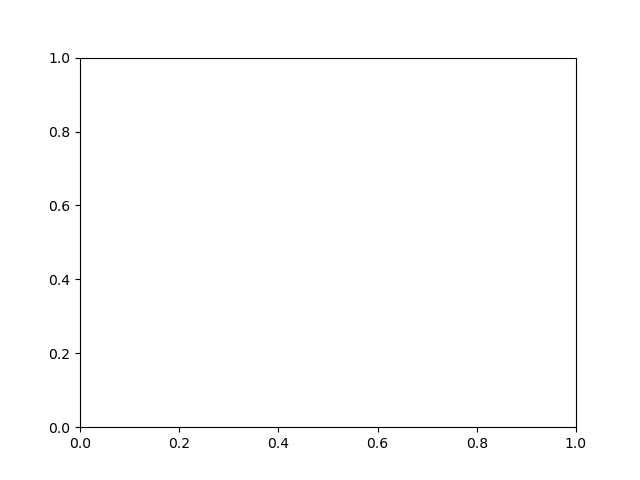

ValueError: x and y must have same first dimension, but have shapes (6,) and (40,)

In [14]:
fig, ax = plt.subplots()

num_samples = 20
step_vals = np.vstack([np.zeros(num_samples), np.ones(num_samples)]).T.flatten()
ax.step(sweep_edges[:num_samples*2], step_vals, 'b')
ax.step(vsync_edges[:num_samples*2], step_vals, 'r')

https://github.com/AllenInstitute/AllenSDK/blob/master/allensdk/brain_observatory/ecephys/stimulus_table/ecephys_visual_coding_time_alignment.ipynb